In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

### Preparing the dataset

In [2]:
# Load and preprocess wine dataset
wine_full_df = pd.read_csv("wine.csv")
wine_full_df.rename(columns={'OD280/OD315 of diluted wines': 'Wine Dilution'}, inplace=True)

wine_df = wine_full_df.drop(columns=['Wine Variety'])
wine_y = wine_full_df['Wine Variety'] 

wine_features = wine_df.columns.tolist()
wine_features

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total Phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'Wine Dilution',
 'Proline']

In [ ]:
['Total Phenols', "Flavanoid", "Proanthocyanins", "Wine Dilution"]

In [3]:
wine_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Wine Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
col1 = "Total Phenols"
col2 = "Proanthocyanins"

<Axes: xlabel='Total Phenols', ylabel='Proanthocyanins'>

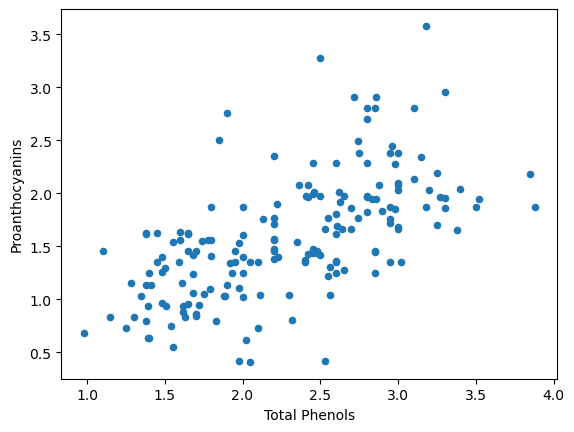

In [5]:
wine_df.plot.scatter(col1, col2)

### Hierarchical Clustering

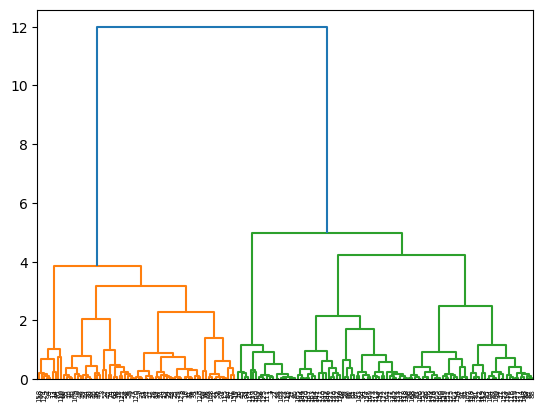

In [6]:
new_df = wine_df[[col1, col2]]

dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

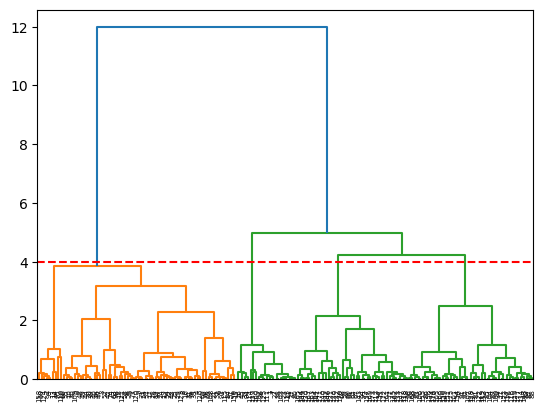

In [23]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))
# plot horizontal line
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

In [24]:
agg_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

<Axes: xlabel='Total Phenols', ylabel='Proanthocyanins'>

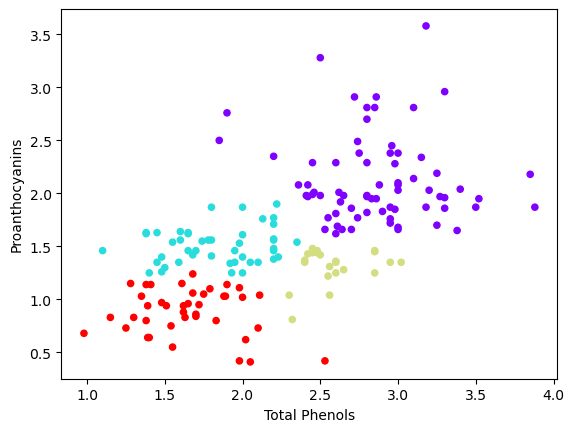

In [25]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

### KMeans

In [10]:
inertias = []
k_range = range(2, 15)

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto").fit(new_df)
    inertias.append([k, km_model.inertia_])
    
inertias

[[2, 52.73096853932584],
 [3, 39.430800089712925],
 [4, 32.36556374299457],
 [5, 24.510733612385977],
 [6, 20.17238232435886],
 [7, 17.09004038924812],
 [8, 15.997367452847572],
 [9, 14.998284367569257],
 [10, 11.84952545743146],
 [11, 10.661030674603175],
 [12, 10.346852062989987],
 [13, 8.657481790934547],
 [14, 7.9537185622513045]]

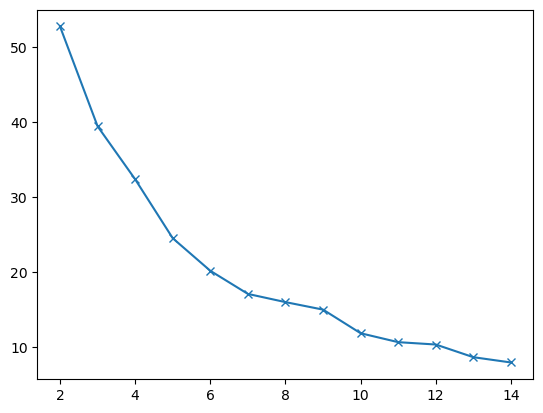

In [11]:
inertias = np.array(inertias)
plt.plot(inertias[:,0], inertias[:,1], 'x-')
plt.show()

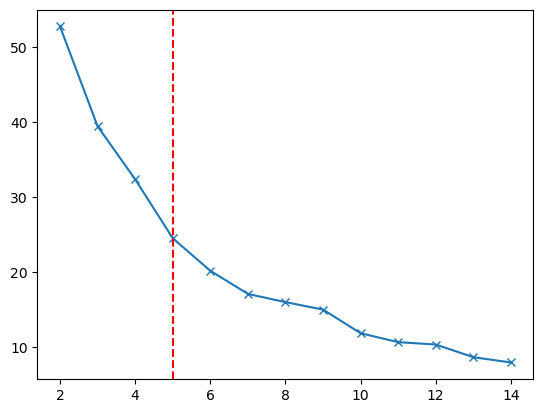

In [12]:
plt.plot(inertias[:,0], inertias[:,1], 'x-')
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

<Axes: xlabel='Total Phenols', ylabel='Proanthocyanins'>

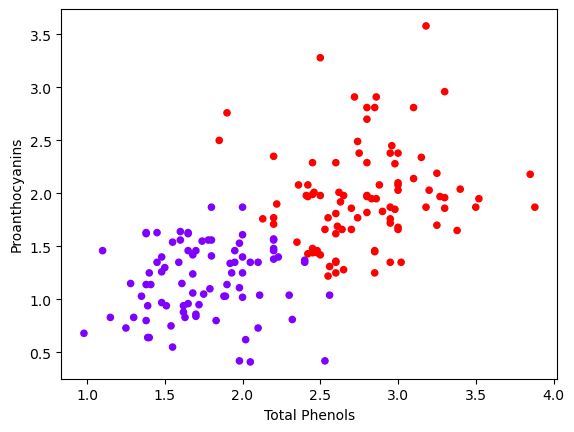

In [13]:
km_model = KMeans(n_clusters=2, n_init="auto").fit(new_df)
new_df.plot.scatter(col1, col2, c = km_model.labels_, cmap="rainbow", colorbar=False)

In [26]:
highest_score = -1
k_with_highest_score = -1
for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto').fit(new_df)
    km_labels = km_model.predict(new_df)
    avg = silhouette_score(new_df, km_labels)
    print((k, round(avg, 4)))
    
    if avg > highest_score:
        highest_score = avg
        k_with_highest_score = k

(2, 0.4867)
(3, 0.4245)
(4, 0.3883)
(5, 0.3557)
(6, 0.3514)
(7, 0.347)
(8, 0.3598)
(9, 0.3399)
(10, 0.3743)
(11, 0.3667)
(12, 0.3479)
(13, 0.3685)
(14, 0.3139)


In [15]:
highest_score

0.48669896915261107

In [16]:
k_with_highest_score

2

In [17]:
km_model = KMeans(n_clusters=2, n_init='auto').fit(new_df)

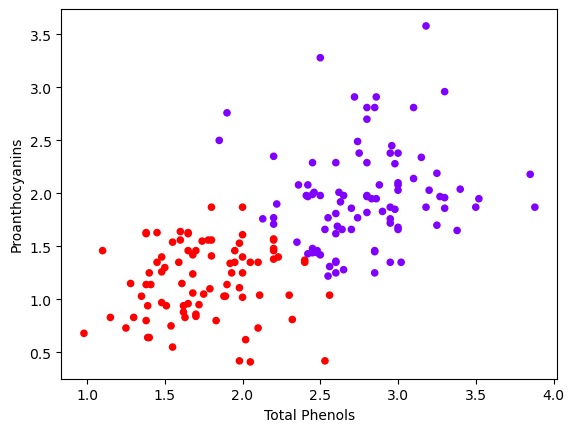

In [18]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()